In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Read data frame from csv file
df = pd.read_csv('TC1002S/covid19_tweets.csv')

#Show the first 5 rows of the data frame
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [5]:
#Date column range
df['date'].min(), df['date'].max()

('2020-07-24 23:47:08', '2020-08-04 07:57:03')

In [6]:
#Extracting the column 'user_location'
df['user_location']

#Converting the column 'user_location' to a column of type string
df['user_location'] = df['user_location'].astype(str)

#Creating a new column 'country' and assigning the value 'None' to all the rows
df['country'] = 'None'

#Displaying the first 5 rows of the data frame
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,country
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,None
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,None
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,None
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,None
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,None


In [7]:
#Importing the library spacy
import spacy

#Loading the model 'en_core_web_sm'
nlp = spacy.load('en_core_web_sm')

In [8]:
#Preprocessing Text Data
#Creating a function to extract the country from the column 'user_location'
def get_country(text):
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == 'GPE':
            return ent.text
    return None

#Applying the function to the column 'user_location' and storing the result in the column 'country'
df['country'] = df['user_location'].apply(get_country)

#Displaying the first 5 rows of the data frame
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,country
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,None
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,New York
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,None
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,None
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,Jammu


In [52]:
#Extracting the column 'country' and storing it in another data frame
df_country = df['country']


In [29]:
#Counting df_country values
df5 = df_country.value_counts()[:300]


In [28]:
#Downloading the dataset df5 as a csv file
df5.to_csv('df5.csv')


In [9]:
#Downloading df_country as a csv file
df_country.to_csv('TC1002S/country.csv', index=False)

In [54]:
#Duplicating df_country and storing it in another data frame
df_country2 = df_country

#Using a list in order to remap the values of the column 'country', so that the values that are in the list city_to_country are replaced if they are found in the column 'country', if not in the list city_to_country, the value 'undefined country', if the value is NaN, leave it
city_to_country = {
    "United States": "United States",
    "London": "United Kingdom",
    "New Delhi": "India",
    "New York": "United States",
    "Mumbai": "India",
    "Washington": "United States",
    "Los Angeles": "United States",
    "England": "United Kingdom",
    "USA": "United States",
    "Toronto": "Canada",
    "California": "United States",
    "Canada": "Canada",
    "Chicago": "United States",
    "Australia": "Australia",
    "South Africa": "South Africa",
    "UK": "United Kingdom",
    "Melbourne": "Australia",
    "United Kingdom": "United Kingdom",
    "Nairobi": "Kenya",
    "Florida": "United States",
    "Sydney": "Australia",
    "Atlanta": "United States",
    "Texas": "United States",
    "Boston": "United States",
    "San Francisco": "United States",
    "Switzerland": "Switzerland",
    "Lagos": "Nigeria",
    "Houston": "United States",
    "Vancouver": "Canada",
    "Johannesburg": "South Africa",
    "Ontario": "Canada",
    "Beijing": "China",
    "Seattle": "United States",
    "Bengaluru": "India",
    "Hyderabad": "India",
    "Philippines": "Philippines",
    "Las Vegas": "United States",
    "Singapore": "Singapore",
    "Ireland": "Ireland",
    "Bhubaneshwar": "India",
    "Hong Kong": "Hong Kong",
    "San Diego": "United States",
    "Philadelphia": "United States",
    "Austin": "United States",
    "Manila": "Philippines",
    "Ottawa": "Canada",
    "New Jersey": "United States",
    "Dallas": "United States",
    "Kenya": "Kenya",
    "Scotland": "United Kingdom",
    "Dubai": "United Arab Emirates",
    "Ohio": "United States",
    "Pakistan": "Pakistan",
    "North Carolina": "United States",
    "Odisha": "India",
    "New York City": "United States",
    "Portland": "United States",
    "Jammu": "India",
    "Geneva": "Switzerland",
    "Baltimore": "United States",
    "Delhi": "India",
    "Miami": "United States",
    "Colorado": "United States",
    "Jaipur": "India",
    "Brooklyn": "United States",
    "Nashville": "United States",
    "Georgia": "United States",
    "Paris": "France",
    "Bangkok": "Thailand",
    "Dublin": "Ireland",
    "Brussels": "Belgium",
    "Sacramento": "United States",
    "Michigan": "United States",
    "Sri Lanka": "Sri Lanka",
    "Calgary": "Canada",
    "New Orleans": "United States",
    "Phoenix": "United States",
    "Arizona": "United States",
    "British Columbia": "Canada",
    "Malaysia": "Malaysia",
    "Uganda": "Uganda",
    "Pretoria": "South Africa",
    "Cambridge": "United Kingdom",
    "Oregon": "United States",
    "Birmingham": "United Kingdom",
    "Denver": "United States",
    "Brisbane": "Australia",
    "Minneapolis": "United States",
    "United Arab Emirates": "United Arab Emirates",
    "Alberta": "Canada",
    "Pennsylvania": "United States",
    "Oakland": "United States",
    "Pittsburgh": "United States",
    "Virginia": "United States",
    "Illinois": "United States",
    "Berlin": "Germany",
    "Manhattan": "United States",
    "Ghana": "Ghana",
    "San Antonio": "United States",
    "Tampa": "United States",
    "Japan": "Japan",
    "Abuja, Nigeria": "Nigeria",
    "Wisconsin": "United States",
    "Tennessee": "United States",
    "Orlando": "United States",
    "Detroit": "United States",
    "US": "United States",
    "America": "United States",
    "Charlotte": "United States",
    "Noida": "India",
    "NC": "United States",
    "Pune, India": "India",
    "Doha": "Qatar",
    "Kansas City": "United States",
    "Gujarat": "India",
    "France": "France",
    "Kerala": "India",
    "Victoria": "Australia",
    "Maryland": "United States",
    "Queensland": "Australia",
    "Tokyo": "Japan",
    "Kuala Lumpur": "Malaysia",
    "Massachusetts": "United States",
    "Salt Lake City": "United States",
    "Kampala": "Uganda",
    "Minnesota": "United States",
    "Columbus": "United States",
    "Bangladesh": "Bangladesh",
    "Nigeria": "Nigeria",
    "Srinagar": "India",
    "Indiana": "United States",
    "Kolkata": "India",
    "Islamabad": "Pakistan",
    "Cleveland": "United States",
    "Germany": "Germany",
    "Washington DC": "United States",
    "Connecticut": "United States",
    "Edinburgh": "United Kingdom",
    "Thailand": "Thailand",
    "Arkansas": "United States",
    "Dublin City": "Ireland",
    "Amsterdam": "Netherlands",
    "Indianapolis": "United States",
    "St. Louis": "United States",
    "INDIA": "India",
    "Kentucky": "United States",
    "Richmond": "United States",
    "Montr√©al": "Canada",
    "Perth": "Australia",
    "Montreal": "Canada",
    "Ahmadabad City": "India",
    "Northern Ireland": "United Kingdom",
    "Karachi": "Pakistan",
    "Missouri": "United States",
    "Vienna": "Austria",
    "Arlington": "United States",
    "Qatar": "Qatar",
    "Netherlands": "Netherlands",
    "Raleigh": "United States",
    "Cincinnati": "United States",
    "Salford": "United Kingdom",
    "Milwaukee": "United States",
    "Quezon City": "Philippines",
    "Alabama": "United States",
    "San Jose": "United States",
    "Zimbabwe": "Zimbabwe",
    "Barcelona": "Spain",
    "Vijayawada": "India",
    "Maldives": "Maldives",
    "New Zealand": "New Zealand",
    "Zurich": "Switzerland",
    "Wales": "United Kingdom",
    "Salem": "India",
    "United States of America": "United States",
    "Israel": "Israel",
    "LA": "United States",
    "Bronx": "United States",
    "South Carolina": "United States",
    "Utrecht": "Netherlands",
    "Liverpool": "United Kingdom",
    "Oklahoma": "United States",
    "South Australia": "Australia",
    "Ibadan": "Nigeria",
    "Orange County": "United States",
    "DC": "United States",
    "Tulsa": "United States",
    "Maine": "United States",
    "Lebanon": "Lebanon",
    "South West": "United Kingdom",
    "Ann Arbor": "United States",
    "Louisville": "United States",
    "Newcastle": "Australia",
    "U.S.": "United States",
    "Gurgaon": "India",
    "Stockholm": "Sweden",
    "Durham": "United States",
    "Fort Worth": "United States",
    "Jacksonville": "United States",
    "Istanbul": "Turkey",
    "Madrid": "Spain",
    "Boulder": "United States",
    "Jakarta": "Indonesia",
    "Charleston": "United States",
    "Muscat": "Oman",
    "Tallahassee": "United States",
    "Karnataka": "India",
    "El Paso": "United States",
    "Spain": "Spain",
    "Sheffield": "United Kingdom",
    "Belfast": "United Kingdom",
    "Vermont": "United States",
    "St Louis": "United States",
    "Little Rock": "United States",
    "Seoul": "South Korea",
    "Makati City": "Philippines",
    "Beirut": "Lebanon",
    "Hawaii": "United States",
    "Louisiana": "United States",
    "Bethesda": "United States",
    "Udhampur": "India",
    "Auckland": "New Zealand",
    "Indonesia": "Indonesia",
    "Bahrain": "Bahrain",
    "Athens": "Greece",
    "Belgium": "Belgium",
    "New South Wales": "Australia",
    "Harare": "Zimbabwe",
    "Canberra": "Australia",
    "Bellevue": "United States",
    "Kaduna": "Nigeria",
    "Saskatchewan": "Canada",
    "Omaha": "United States",
    "New Mexico": "United States",
    "Palo Alto": "United States",
    "Ahmedabad": "India",
    "Saudi Arabia": "Saudi Arabia",
    "Lucknow": "India",
    "North West": "United Kingdom",
    "Brazil": "Brazil",
    "Baton Rouge": "United States",
    "Santa Monica": "United States",
    "Long Beach": "United States",
    "Alexandria": "United States",
    "Springfield": "United States",
    "Italy": "Italy",
    "Brighton": "United Kingdom",
    "Iowa": "United States",
    "Telangana": "India",
    "Boca Raton": "United States",
    "Rome": "Italy",
    "Sarasota": "United States",
    "Cambodia": "Cambodia",
    "Fort Lauderdale": "United States",
    "MD": "United States",
    "Westchester County": "United States",
    "Delaware": "United States",
    "Albuquerque": "United States",
    "Ethiopia": "Ethiopia",
    "Trivandrum": "India",
    "Kansas": "United States",
    "Scottsdale": "United States",
    "Staten Island": "United States",
    "Winnipeg": "Canada",
    "Oklahoma City": "United States",
    "Santa Barbara": "United States",
    "Utah": "United States",
    "Rwanda": "Rwanda",
    "Oman": "Oman",
    "india": "India",
    "Tasmania": "Australia",
    "Mombasa": "Kenya",
    "Mississippi": "United States",
    "Kingston": "Jamaica",
    "Jackson": "United States",
    "Greenville": "United States",
    "West Bengal": "India",
    "Jerusalem": "Israel",
    "Des Moines": "United States",
    "East Midlands": "United Kingdom",
    "New Hampshire": "United States",
    "Shanghai": "China",
    "New Haven": "United States",
    "Lexington": "United States",
    "Luxembourg": "Luxembourg",
    "Peoria": "United States",
    "Mexico City": "Mexico",
    "Greece": "Greece",
    "China": "China",
    "Vernal": "United States",
    "Alaska": "United States",
    "Kathmandu": "Nepal",
    "Wichita": "United States",
    "U.S.A.": "United States",
    "Pasadena": "United States",
    "Makati": "Philippines",
    "Nevada": "United States",
    "Newark": "United States",
    "Jharsuguda": "India",
    "Saint Louis": "United States",
}

#Remapping the values of the column 'country' using the list city_to_country
df_country2 = df_country2.map(city_to_country)

#Displaying the first 5 rows of the data frame
df_country2.head()



0              NaN
1    United States
2              NaN
3              NaN
4            India
Name: country, dtype: object

In [55]:
#Downloading df_country2 as a csv file
df_country2.to_csv('country2.csv', index=False)

In [37]:
#Counting df_country2 values
df6 = df_country2.value_counts()

#Displaying the count of the values of the column 'country'
df6

United States           15047
India                    4000
United Kingdom           3489
Canada                   2216
Australia                1737
South Africa              856
Kenya                     583
Nigeria                   507
Switzerland               486
Philippines               473
Ireland                   354
China                     302
Pakistan                  250
United Arab Emirates      241
Singapore                 207
Hong Kong                 198
France                    172
Malaysia                  161
Uganda                    160
Thailand                  159
Japan                     139
Netherlands               137
Germany                   136
Belgium                   130
Qatar                     116
Spain                     106
Sri Lanka                 100
Ghana                      76
Zimbabwe                   72
New Zealand                70
Lebanon                    64
Bangladesh                 64
Indonesia                  59
Israel    

In [33]:
#Display df_country2
df_country2

0                  NaN
1        United States
2                  NaN
3                  NaN
4                India
             ...      
74431    United States
74432              NaN
74433              NaN
74434              NaN
74435    United States
Name: country, Length: 74436, dtype: object

<Axes: >

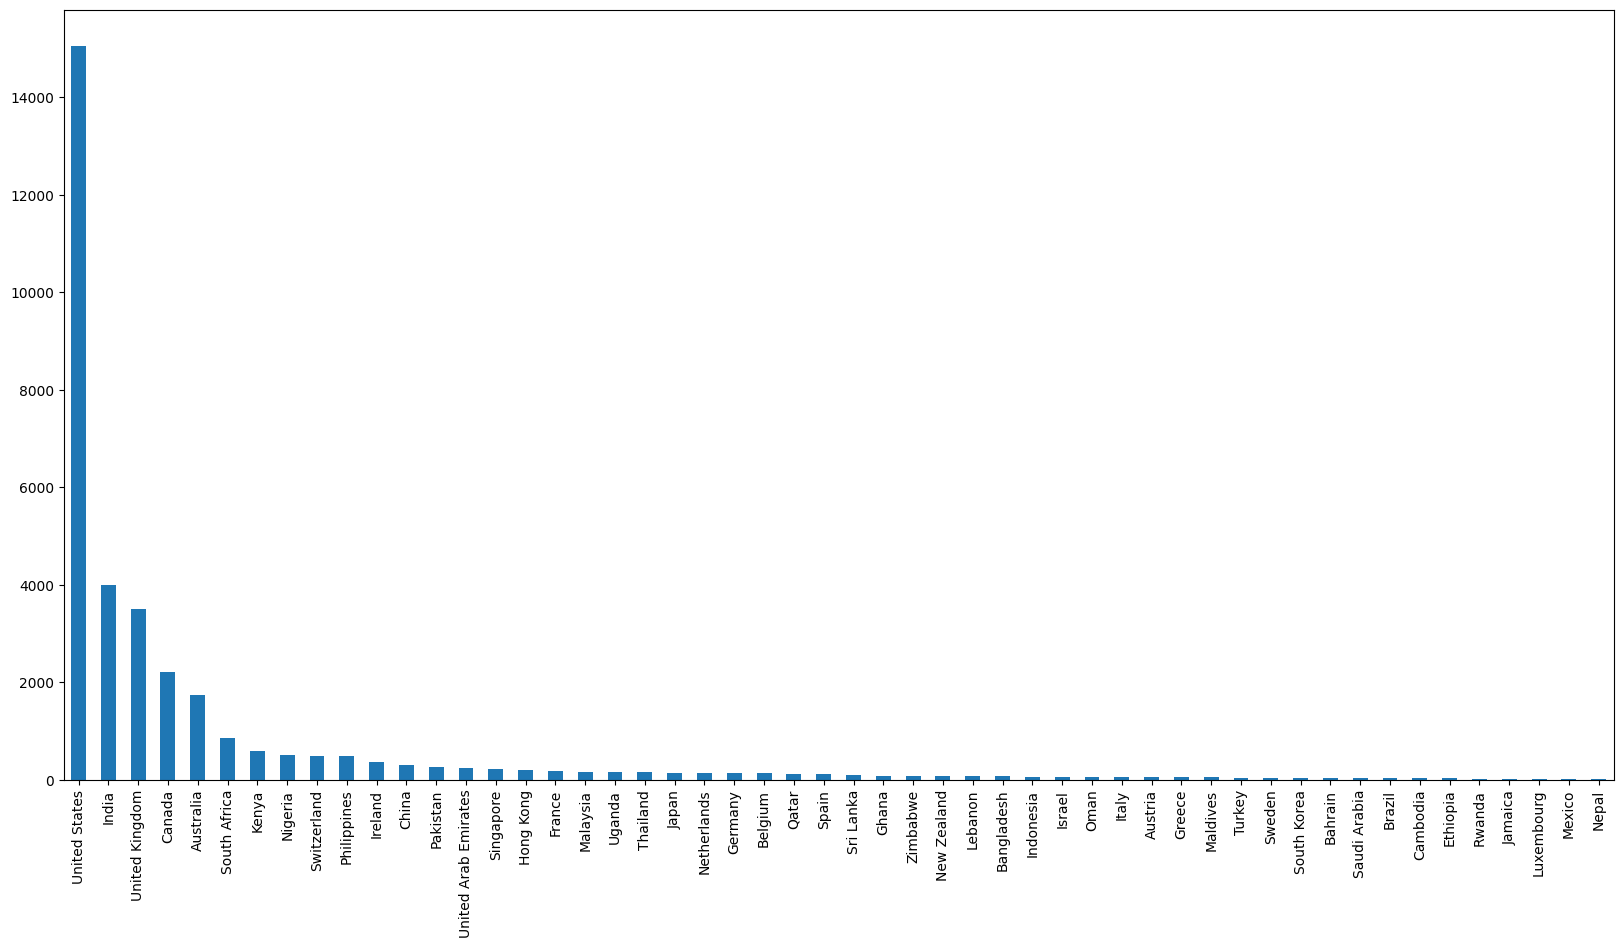

In [34]:
#Plot df country 2
df6.plot.bar(figsize=(20,10))

In [3]:
#Download df6 plot as a png file
plt.savefig('df6.png')

<Figure size 640x480 with 0 Axes>

In [38]:
#Add to df_country2 the column user_followers
df_country2 = pd.concat([df_country2, df['user_followers']], axis=1)

#Display df_country2
df_country2


,country,user_followers
0,NaN,624
1,United States,2253
2,NaN,9275
3,NaN,197
4,India,101009
...,...,...
74431,United States,85
74432,NaN,4289
74433,NaN,1413
74434,NaN,2554


In [41]:
#Converting countries to numbers in order to plot them in positive integers
df_country2['country'] = pd.factorize(df_country2['country'])[0] + 1


#Display df_country2
df_country2

,country,user_followers
0,1,624
1,2,2253
2,1,9275
3,1,197
4,3,101009
...,...,...
74431,2,85
74432,1,4289
74433,1,1413
74434,1,2554


/Users/pedroperez/.pyenv/versions/3.9.1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


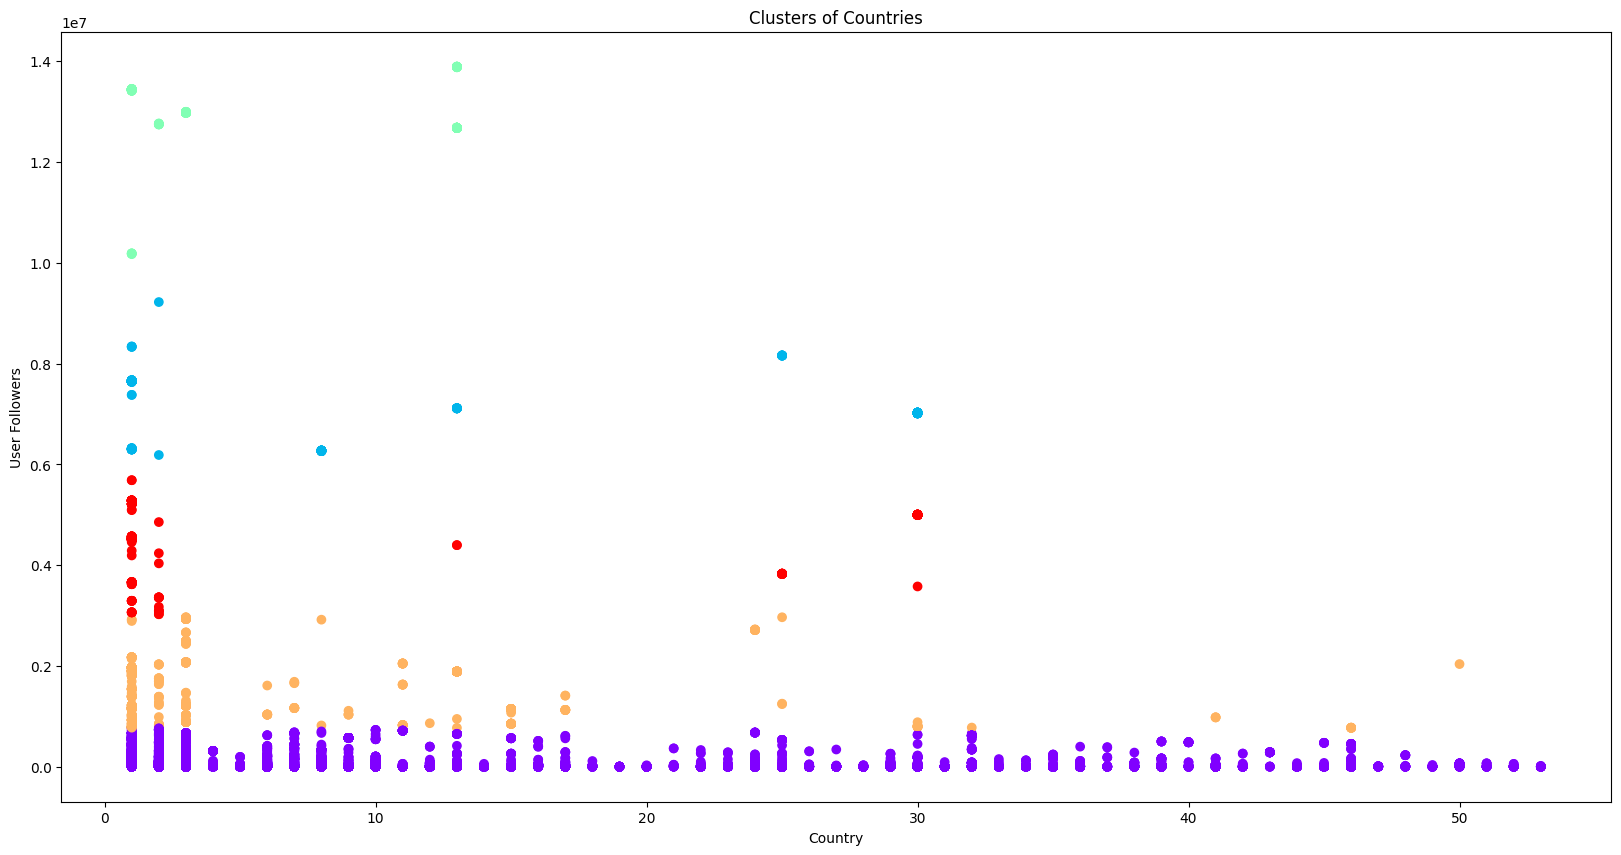

5

In [42]:
# K Means Clustering Algorithm to cluster the data
#Importing the library sklearn
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

#Fitting the data
kmeans.fit(df_country2)

#Predicting the clusters
clusters = kmeans.predict(df_country2)

#Displaying the clusters
clusters

#Adding the column 'cluster' to the data frame
df_country2['cluster'] = clusters

#Displaying the first 5 rows of the data frame
df_country2.head()

#Plotting the clusters and the centroids
plt.figure(figsize=(20,10))
plt.scatter(df_country2['country'], df_country2['user_followers'], c=df_country2['cluster'], cmap='rainbow')
plt.xlabel('Country')
plt.ylabel('User Followers')
plt.title('Clusters of Countries')
plt.show()

#Displaying the centroids
kmeans.cluster_centers_

#Displaying the number of clusters
kmeans.n_clusters



In [32]:
#Displaying the first 5 rows of the data frame
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,country
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,None
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,New York
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,None
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,None
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,Jammu


In [43]:
#Verifiy correlation between country and user followers
df_country2.corr()


,country,user_followers,cluster
country,1.000000,0.077440,0.067075
user_followers,0.077440,1.000000,0.584129
cluster,0.067075,0.584129,1.000000
